# Overview:
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

## Data:
The dataset you will use comes from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

## Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

This is a required assignment and counts toward program completion.

### Business Problem
It should be stressed that due to internal competition and
current financial crisis, there are huge pressures for
European banks to increase a financial asset. 

increase
efficiency of directed campaigns for long-term deposit
subscriptions by reducing the number of contacts to do.

## Submission Instructions:
Submit the website URL to your public-facing GitHub repository here
Your Learning Facilitators will grade your submission according to the rubric below

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [19]:
bank = pd.read_csv('data/bank-additional.csv', sep=';')
orig = pd.read_csv('data/bank-additional.csv', sep=';') # use as reference copy

In [20]:
#data
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Considerations for Bank model

* many parameters
* many need to be encoded
* unbalanced


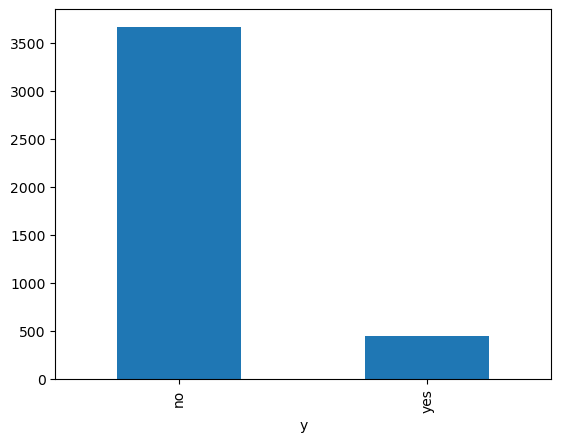

In [21]:
#build a histogram of the y counts
bank['y'].value_counts().plot(kind='bar')
plt.show()



### Data Prep

#### notes from article
* Understanding we transformed the output into a binary
task, by using only the conclusive results of Table 1:
successful and unsuccessful.
* Hence,
the non-conclusive instances were discarded, leading to a
total of 55817 contacts (the same 6499 successes).
* For example, Figure 2 shows that the Sex attribute can be
discarded, since the rate of successes for Male and Female
is almost the same. 
* Since we had a large dataset, we opted to discard
the examples that contained missing values, leading to a
dataset with 45211 instances (5289 of which were
successful – 11.7% success rate).




In [22]:
# replace the y values with 0 and 1
bank['y'] = bank['y'].replace('no', 0)
bank['y'] = bank['y'].replace('yes', 1)



In [23]:
# look at the column types
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [24]:
# get the counts of the education column
bank['education'].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [25]:
# numeric encode the education column
ed_values = {'education': ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']}

# Define a mapping dictionary for education levels
ed_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1
}

# Create a new column 'education_encoded' using the mapping
bank['education_encoded'] = bank['education'].map(ed_mapping)

#replace the unknown values with the mean of the known values in the education_encoded column
mean_ed = round(bank[bank['education_encoded'] != -1]['education_encoded'].mean())
bank['education_encoded'] = bank['education_encoded'].replace(-1, mean_ed)





In [26]:
# drop the original education column
bank = bank.drop('education', axis=1)
bank.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_encoded
0,30,blue-collar,married,no,yes,no,cellular,may,fri,487,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,3
1,39,services,single,no,no,no,telephone,may,fri,346,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,4
2,25,services,married,no,yes,no,telephone,jun,wed,227,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,4
3,38,services,married,no,unknown,unknown,telephone,jun,fri,17,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,3
4,47,admin.,married,no,yes,no,cellular,nov,mon,58,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,6


In [27]:
# look at the value counts for all the non-numeric columns
for col in bank.columns:
    if bank[col].dtype == 'object':
        print(bank[col].value_counts())
        print('\n')

        

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64


default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64


loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


contact
cellular     2652
telephone    1467
Name: count, dtype: int64


month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64


day_of_week
thu    860
mon    855
tue    841
wed    795
fri    768
Name: count, dtype: int64


poutcome
nonexistent    3523
f

In [28]:
# numeric encode the day_of_week column
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}

bank['day_of_week_encoded'] = bank['day_of_week'].map(day_mapping)

# drop the original day_of_week column
bank = bank.drop('day_of_week', axis=1)

bank.head()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_encoded,day_of_week_encoded
0,30,blue-collar,married,no,yes,no,cellular,may,487,2,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,3,5
1,39,services,single,no,no,no,telephone,may,346,4,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,4,5
2,25,services,married,no,yes,no,telephone,jun,227,1,...,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,4,3
3,38,services,married,no,unknown,unknown,telephone,jun,17,3,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,3,5
4,47,admin.,married,no,yes,no,cellular,nov,58,1,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,6,1


In [29]:
# numeric encode the month column
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

bank['month_encoded'] = bank['month'].map(month_mapping)

# drop the original month column
bank = bank.drop('month', axis=1)

bank.head()

,age,job,marital,default,housing,loan,contact,duration,campaign,pdays,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_encoded,day_of_week_encoded,month_encoded
0,30,blue-collar,married,no,yes,no,cellular,487,2,999,...,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,3,5,5
1,39,services,single,no,no,no,telephone,346,4,999,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,4,5,5
2,25,services,married,no,yes,no,telephone,227,1,999,...,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,4,3,6
3,38,services,married,no,unknown,unknown,telephone,17,3,999,...,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,3,5,6
4,47,admin.,married,no,yes,no,cellular,58,1,999,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,6,1,11


In [30]:
# list the remaining non-numeric columns

for col in bank.columns:
    if bank[col].dtype == 'object':
        print(col)
        

job
marital
default
housing
loan
contact
poutcome


In [33]:
# one-hot encode the 'marital', 'default', 'housing', 'loan', 'contact', and 'poutcome' columns
bank = pd.get_dummies(bank, columns=['marital', 'default', 'housing', 'loan', 'contact', 'poutcome'])

bank.head()




,age,job,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,487,2,999,0,-1.8,92.893,-46.2,1.313,...,False,True,True,False,False,True,False,False,True,False
1,39,services,346,4,999,0,1.1,93.994,-36.4,4.855,...,False,False,True,False,False,False,True,False,True,False
2,25,services,227,1,999,0,1.4,94.465,-41.8,4.962,...,False,True,True,False,False,False,True,False,True,False
3,38,services,17,3,999,0,1.4,94.465,-41.8,4.959,...,True,False,False,True,False,False,True,False,True,False
4,47,admin.,58,1,999,0,-0.1,93.200,-42.0,4.191,...,False,True,True,False,False,True,False,False,True,False


In [35]:
# set y to the 'y' column
y = bank['y']

# drop the 'y' column from the dataframe
bank = bank.drop('y', axis=1)


In [38]:

X = bank

# for now, drop the 'job' column
X = X.drop('job', axis=1)



In [39]:
#sepate the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Model Building

## Decision Tree

In [ ]:
# build a decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
%time
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'DT Model accuracy: {accuracy:.2f}')


CPU times: user 7 µs, sys: 3 µs, total: 10 µs
Wall time: 28.8 µs
DT Model accuracy: 0.90


In [92]:
# do a grid search to find the best hyperparameters for a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dt_model_search(X_train, y_train, verbose=False):
    if (verbose) :
        print('\nDecision Tree Classifier:\n------------------------\n')

    tree = DecisionTreeClassifier(random_state=17)

    tree_params = {'max_depth': range(1, 11),
                    'max_features': range(4, 19)}

    tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=verbose)

    tree_grid.fit(X_train, y_train)

    if (verbose) :
        # print the best hyperparameters
        print(f'Parameters: {tree_grid.best_params_}')
        print(f'Accuracy: {tree_grid.best_score_}')

    return tree_grid.best_estimator_



In [73]:

clf = dt_model_search(X_train, y_train)


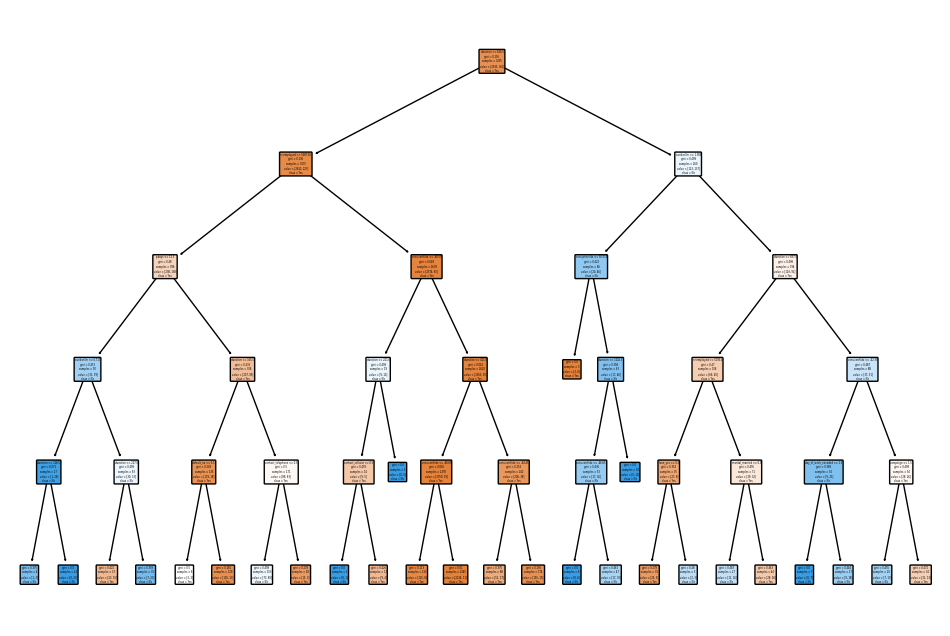

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a plot of the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Yes','No'], rounded=True)
plt.show()


Feature ranking:
1. feature 1 (0.4737938463922389) - duration
2. feature 9 (0.3265580190460331) - nr.employed
3. feature 7 (0.054254825764398364) - cons.conf.idx
4. feature 3 (0.05066786336176929) - pdays
5. feature 8 (0.04099199069726499) - euribor3m
6. feature 27 (0.01350508264496807) - contact_telephone
7. feature 6 (0.010089548001656075) - cons.price.idx
8. feature 17 (0.006038951023370724) - default_no
9. feature 2 (0.005961552614192505) - campaign
10. feature 14 (0.005796719644960454) - marital_married
11. feature 25 (0.005318469679133838) - loan_yes
12. feature 11 (0.004081874571002475) - day_of_week_encoded
13. feature 26 (0.002941256559011203) - contact_cellular
14. feature 10 (0.0) - education_encoded
15. feature 30 (0.0) - poutcome_success
16. feature 12 (0.0) - month_encoded
17. feature 4 (0.0) - previous
18. feature 5 (0.0) - emp.var.rate
19. feature 15 (0.0) - marital_single
20. feature 13 (0.0) - marital_divorced
21. feature 29 (0.0) - poutcome_nonexistent
22. feature 16

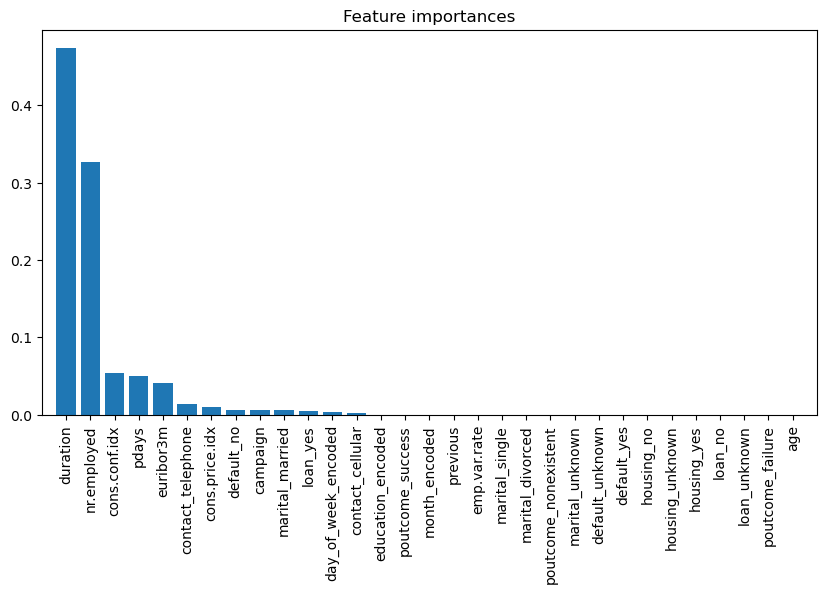

In [43]:
import numpy as np

# show the feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")

# plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


#### Logistic Regression Model

In [50]:

# build a logistic regression model
lgr_model = LogisticRegression(max_iter=10000)
%time
lgr_model.fit(X_train, y_train)

y_pred = lgr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'LR Model accuracy: {accuracy:.2f}')


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs
LR Model accuracy: 0.92


In [95]:
# do a grid search to find the best hyperparameters for a logistic regression model
from sklearn.model_selection import GridSearchCV

def lgr_search(X_train, y_train, verbose=False):
    if (verbose) :
        print('\nLogistic Regression:\n-------------------')
        
    lgr = LogisticRegression(max_iter=10000)

    lgr_params = {'C': [0.01, 0.1, 1, 10, 100]}
    lgr_grid = GridSearchCV(lgr, lgr_params, cv=5, n_jobs=-1, verbose=verbose)

    lgr_grid.fit(X_train, y_train)

    if (verbose) :
        # print the best hyperparameters
        print(f'Parameters:{lgr_grid.best_params_}')
        print(f'Accuracy:{lgr_grid.best_score_}')

    return lgr_grid.best_estimator_

lgr_model = lgr_search(X_train, y_train, True)


Logistic Regression:
-------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters:{'C': 1}
Accuracy:0.911380880121396


### Decision Tree

### KNN

In [56]:
# build a KNN model
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    print(f'KNN Model accuracy with {i} neighbors: {knn_model.score(X_test, y_test)}')
    print(f'KNN Model training accuracy with {i} neighbors: {knn_model.score(X_train, y_train)}')

    


KNN Model accuracy with 1 neighbors: 0.8798543689320388
KNN Model training accuracy with 1 neighbors: 1.0
KNN Model accuracy with 2 neighbors: 0.8992718446601942
KNN Model training accuracy with 2 neighbors: 0.9393019726858877
KNN Model accuracy with 3 neighbors: 0.8980582524271845
KNN Model training accuracy with 3 neighbors: 0.9417298937784522
KNN Model accuracy with 4 neighbors: 0.9004854368932039
KNN Model training accuracy with 4 neighbors: 0.9262518968133535
KNN Model accuracy with 5 neighbors: 0.9065533980582524
KNN Model training accuracy with 5 neighbors: 0.9289833080424886
KNN Model accuracy with 6 neighbors: 0.9004854368932039
KNN Model training accuracy with 6 neighbors: 0.9268588770864947
KNN Model accuracy with 7 neighbors: 0.9101941747572816
KNN Model training accuracy with 7 neighbors: 0.9262518968133535
KNN Model accuracy with 8 neighbors: 0.9029126213592233
KNN Model training accuracy with 8 neighbors: 0.9226100151745068
KNN Model accuracy with 9 neighbors: 0.91504854

In [57]:

knn_model = KNeighborsClassifier(n_neighbors=3)
%time
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Model accuracy: {accuracy}')
print(f'KNN Model training accuracy: {knn_model.score(X_train, y_train)}')

#print the parameters of the KNN model
print(knn_model.get_params())



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
KNN Model accuracy: 0.8980582524271845
KNN Model training accuracy: 0.9417298937784522
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [96]:
# do a grid search to find the best parameters for the KNN model
from sklearn.model_selection import GridSearchCV

def knn_search(X_train, y_train, verbose=False):
    if (verbose) :
        print('\nK-Nearest Neighbors:\n-------------------')
   
    knn = KNeighborsClassifier()

    knn_params = {
        'n_neighbors': range(1, 11),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=verbose)

    knn_grid.fit(X_train, y_train)

    if (verbose) :
        print(f'Parameters: {knn_grid.best_params_}')
        print(f'Accuracy: {knn_grid.best_score_}')

    return knn_grid.best_estimator_

knn_model = knn_search(X_train, y_train, True)



K-Nearest Neighbors:
-------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Parameters: {'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.9050075872534142


### SVM

In [59]:
#build an SVM model
from sklearn.svm import SVC

svm_model = SVC()
%time
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model accuracy: {accuracy:.2f}')


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
SVM Model accuracy: 0.92


In [85]:
def svm_search(X_train, y_train, verbose=False):
    if (verbose) :
        print('\nSupport Vector Machine:\n----------------------')

    svm = SVC()

    svm_params = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=verbose)

    svm_grid.fit(X_train, y_train)

    if (verbose) :
        print(f'Parameters: {svm_grid.best_params_}')
        print(f'Accuracy: {svm_grid.best_score_}')

    return svm_grid.best_estimator_

svm_model = svm_search(X_train, y_train, True)


Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9092564491654022


In [61]:
# build a dataframe to store the results

res_dict = {'model': ['KNN', 'Logistic Regression', 'DT', 'SVC'],
           'train score': [0, 0, 0, 0],
           'test score': [0, 0, 0, 0],
           'fit time': [0, 0, 0, 0]}
results_df = pd.DataFrame(res_dict).set_index('model')

### Run all the grid searches and build the results dataframe

In [97]:
from time import time

def run_grids(X, y, title, verbose=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn_model = knn_search(X_train, y_train, verbose)
    lgr_model = lgr_search(X_train, y_train, verbose)
    dt_model = dt_model_search(X_train, y_train, verbose)
    svm_model = svm_search(X_train, y_train, verbose)

    models = [knn_model, lgr_model, dt_model, svm_model]

    for i, model in enumerate(models):
        start = time()
        model.fit(X_train, y_train)
        end = time()
        fit_time = end - start
        
        results_df.loc[results_df.index[i], 'train score'] = model.score(X_train, y_train)
        results_df.loc[results_df.index[i], 'test score'] = model.score(X_test, y_test)
        results_df.loc[results_df.index[i], 'fit time'] = fit_time

    #save the results to a csv file
    results_df.to_csv('./data/' + title + '_results.csv')

    if (verbose) :
        print('\nResults:\n--------')
        print(results_df)








In [98]:
run_grids(X_train, y_train, 'Bank Data', True)


K-Nearest Neighbors:
-------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.9032617445805302

Logistic Regression:
-------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters:{'C': 0.01}
Accuracy:0.9123699039733195

Decision Tree Classifier:
------------------------

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameters: {'max_depth': 4, 'max_features': 10}
Accuracy: 0.9055402219538842

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9131253234431602

Results:
--------
                     train score  test score  fit time
model                                                 
KNN                     0.924886    0.907436  0.001608
Logistic Regression     0.913126    0.915023  0.054004
DT                    

# Comparison Matrix for Model Types

| **Model**                  | **Handles Imbalanced Classes** | **Training Speed**     | **Interpretability** |
|----------------------------|--------------------------------|------------------------|----------------------|
| **Logistic Regression**     | Fair <br>(can use regularization, balanced class weights) | Fast                  | High <br>(coefficients are interpretable) |
| **Decision Trees**          | Fair <br>(prone to overfitting with imbalanced data) | Fast                  | High <br>(easy to visualize decision rules) |
| **k-Nearest Neighbors (k-NN)** | Poor <br>(sensitive to imbalanced data, performs poorly without special techniques) | Slow <br>(scales poorly with large datasets) | Low <br>(no interpretable model structure) |
| **Support Vector Machines (SVM)** | Poor <br>(sensitive to imbalance, can use class weights) | Slow <br>(especially for large datasets) | Low <br>(hard to interpret, especially in high dimensions) |
